In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 df=pd.read_csv("googleplaystore.csv")
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#to sell the null value of the data
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#total null value of the dataset
df.isnull().sum().sum()

1487

In [7]:
#found the duplicates value of the data set
df.duplicated().sum()

483

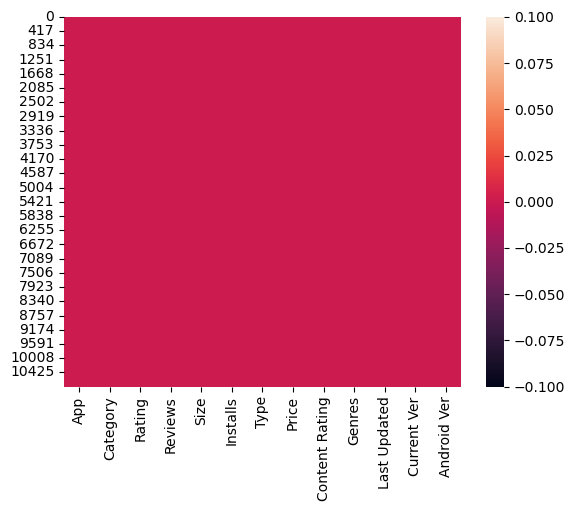

In [111]:
#for graphical representation of null value
sns.heatmap(df.isnull())
plt.show()

In [9]:
unique_names = df['Category'].unique()
print(unique_names)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [10]:
# to chech the how many 1.9 value is available in category column
print((df['Category']=='1.9').sum())

1


In [11]:
#find the 1.9 vakue 
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
#drop the 10472 no rows
df=df.drop(10472,axis=0).reset_index(drop=True)

In [13]:
unique_names = df['Rating'].unique()
print(unique_names)

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]


In [19]:
#Check the percentage of missing data
missing_percentage = df['Rating'].isnull().mean() * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 13.60%


In [22]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)

C:\Users\chaud\AppData\Local\Temp\ipykernel_17636\3537473122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


In [23]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [33]:
(df['Size']=='Varies with device').sum()

1695

In [35]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [37]:
#df['Size']=df['Size'].apply(lambda x: np.float(x.replace('M',''))*1024 if type(x) !=float and 'M' in x else x)
df['Size'] = df['Size'].apply(
    lambda x: float(x.replace('M', '')) * 1024 if isinstance(x, str) and 'M' in x else x
)

In [39]:
df['Size'] = df['Size'].apply(
    lambda x: float(x.replace('k', '')) if isinstance(x, str) and 'k' in x else x
)

In [41]:
df['Size'] = df['Size'].apply(
    lambda x: np.nan if x== 'Varies with device' else x
)

In [43]:
df['Size']

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10835    54272.0
10836     3686.4
10837     9728.0
10838        NaN
10839    19456.0
Name: Size, Length: 10840, dtype: float64

In [45]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,4.3,3,9728.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [47]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [49]:
#fill the null value by mean
df['Size'].fillna(df['Size'].mean(), inplace=True)

In [51]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [53]:
#remove + and , from the data
df["Installs"] = df["Installs"].str.replace("+", "")
df["Installs"] = df["Installs"].str.replace(",", "")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.800000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.200000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,54272.000000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.400000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,4.3,3,9728.000000,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,22032.553406,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [55]:
unique_names = df['Type'].unique()
print(unique_names)

['Free' 'Paid' nan]


In [57]:
#recheck how many null values are there
df[df['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,22032.553406,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [59]:
df=df.drop(9148,axis=0).reset_index(drop=True)

In [61]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [65]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

C:\Users\chaud\AppData\Local\Temp\ipykernel_17636\3605374900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)


In [67]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

C:\Users\chaud\AppData\Local\Temp\ipykernel_17636\304938070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)


In [69]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [71]:
df['Installs']=df['Installs'].astype('float64')

In [73]:
df['Reviews']=df['Reviews'].astype('float64')

In [75]:
df['Size']=df['Size'].astype('float64')

In [77]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [79]:
unique_names = df['Price'].unique()
print(unique_names)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


In [81]:
#remove + and , from the data
df["Price"] = df["Price"].str.replace("$", "")

In [83]:
unique_names = df['Price'].unique()
print(unique_names)

['0' '4.99' '3.99' '6.99' '1.49' '2.99' '7.99' '5.99' '3.49' '1.99' '9.99'
 '7.49' '0.99' '9.00' '5.49' '10.00' '24.99' '11.99' '79.99' '16.99'
 '14.99' '1.00' '29.99' '12.99' '2.49' '10.99' '1.50' '19.99' '15.99'
 '33.99' '74.99' '39.99' '3.95' '4.49' '1.70' '8.99' '2.00' '3.88' '25.99'
 '399.99' '17.99' '400.00' '3.02' '1.76' '4.84' '4.77' '1.61' '2.50'
 '1.59' '6.49' '1.29' '5.00' '13.99' '299.99' '379.99' '37.99' '18.99'
 '389.99' '19.90' '8.49' '1.75' '14.00' '4.85' '46.99' '109.99' '154.99'
 '3.08' '2.59' '4.80' '1.96' '19.40' '3.90' '4.59' '15.46' '3.04' '4.29'
 '2.60' '3.28' '4.60' '28.99' '2.95' '2.90' '1.97' '200.00' '89.99' '2.56'
 '30.99' '3.61' '394.99' '1.26' '1.20' '1.04']


In [85]:
df['Price']=df['Price'].astype('float64')

In [87]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [89]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-07-25
10835   2018-07-06
10836   2017-01-20
10837   2015-01-19
10838   2018-07-25
Name: Last Updated, Length: 10839, dtype: datetime64[ns]

In [91]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25600.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [93]:
df.to_csv('Cleaned_googleplaystore.csv' , index = False)

Download rate by categories (with percentage):
                      Total_Downloads  Percentage
Category                                        
GAME                    3.508602e+10   20.930207
COMMUNICATION           3.264728e+10   19.475397
PRODUCTIVITY            1.417609e+10    8.456601
SOCIAL                  1.406987e+10    8.393235
TOOLS                   1.145277e+10    6.832033
FAMILY                  1.025826e+10    6.119462
PHOTOGRAPHY             1.008825e+10    6.018040
NEWS_AND_MAGAZINES      7.496318e+09    4.471851
TRAVEL_AND_LOCAL        6.868887e+09    4.097564
VIDEO_PLAYERS           6.222003e+09    3.711672
SHOPPING                3.247849e+09    1.937471
ENTERTAINMENT           2.869160e+09    1.711568
PERSONALIZATION         2.325495e+09    1.387250
BOOKS_AND_REFERENCE     1.921470e+09    1.146233
SPORTS                  1.751174e+09    1.044645
HEALTH_AND_FITNESS      1.583073e+09    0.944366
BUSINESS                1.001915e+09    0.597682
FINANCE              

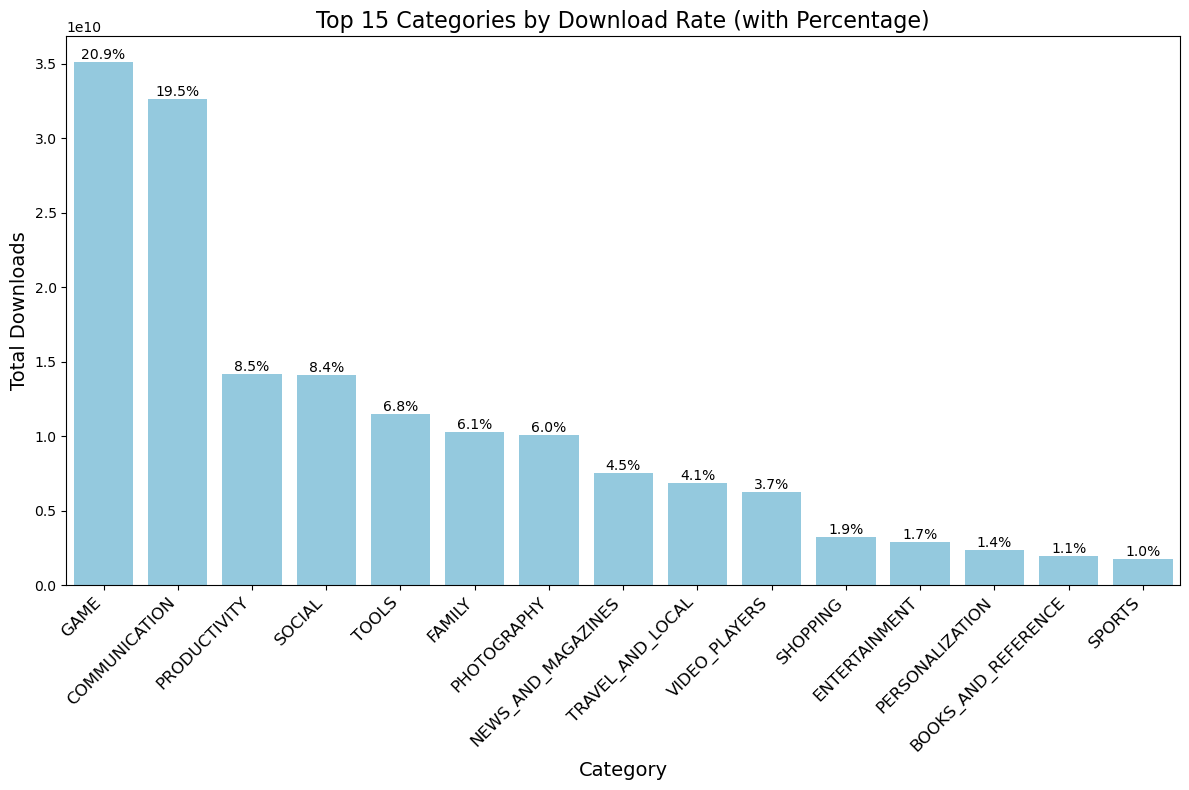

In [119]:
# 1. What is the download rate by categories?    

import matplotlib.pyplot as plt
import seaborn as sns

total_installs = df['Installs'].sum()
download_rate_by_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
download_rate_percentage = (download_rate_by_category / total_installs) * 100

# Combine absolute and percentage values into a single DataFrame
download_rate_summary = pd.DataFrame({'Total_Downloads': download_rate_by_category,
                                      'Percentage': download_rate_percentage}).sort_values(by='Total_Downloads', ascending=False)

print("Download rate by categories (with percentage):\n", download_rate_summary)


top_15_categories = download_rate_summary.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_categories.index, 
            y=top_15_categories['Total_Downloads'], 
            color='skyblue')  # Use a single color to avoid the warning

# Add percentage labels on top of the bars
for index, value in enumerate(top_15_categories['Total_Downloads']):
    percentage = top_15_categories['Percentage'].iloc[index]
    plt.text(index, value, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Top 15 Categories by Download Rate (with Percentage)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Downloads', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [157]:
#2
# Formatting the Installs column into readable values (e.g., 1B for 1 billion)
def format_installs(value):
    if value >= 1e9:
        return f"{value / 1e9:.1f}B"   
    else:
        return str(value)

apps = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(15)

apps['Installs(in B)'] = apps['Installs'].apply(format_installs)

apps_with_original_index = apps.reset_index()
apps_with_original_index.index += 1  # Adjust rank to start at 1
apps_with_original_index.rename(columns={'index': 'Original_Index'}, inplace=True)

print("\n15 Most Downloaded Applications with Both Raw and Formatted Install Values:\n")
print(apps_with_original_index)


15 Most Downloaded Applications with Both Raw and Formatted Install Values:

    Original_Index                                       App      Installs  \
1             3665                                   YouTube  1.000000e+09   
2             4104  Messenger – Text and Video Chat for Free  1.000000e+09   
3             3896                            Subway Surfers  1.000000e+09   
4             3996              Google Chrome: Fast & Secure  1.000000e+09   
5             3909                                 Instagram  1.000000e+09   
6              865                         Google Play Games  1.000000e+09   
7              464                                  Hangouts  1.000000e+09   
8             1917                            Subway Surfers  1.000000e+09   
9             1700                            Subway Surfers  1.000000e+09   
10            3565                              Google Drive  1.000000e+09   
11            3117                 Maps - Navigate & Explore  1.

In [161]:
# 3. What is the download rate for paid applications?

def format_total_installs(value):
    # Formatting the total installs into readable values (Billion, Million, Thousand, etc.).
    if value >= 1e9:
        return f"{value / 1e9:.1f}B (Billion)"
    elif value >= 1e6:
        return f"{value / 1e6:.1f}M (Million)"
    elif value >= 1e3:
        return f"{value / 1e3:.1f}K (Thousand)"
    else:
        return str(value)

# Calculating total downloads for paid applications
total_downloads_paid = df[df['Type'] == 'Paid']['Installs'].sum()
formatted_total_downloads_paid = format_total_installs(total_downloads_paid)

# Calculating the number of paid applications
num_paid_apps = df[df['Type'] == 'Paid'].shape[0]

# Calculating the download rate per paid application
download_rate_paid = total_downloads_paid / num_paid_apps if num_paid_apps > 0 else 0
formatted_download_rate_paid = format_total_installs(download_rate_paid)

print("\nTotal Downloads for Paid Applications:")
print(f"Raw Value: {total_downloads_paid}")
print(f"Formatted: {formatted_total_downloads_paid}")

print("\nDownload Rate per Paid Application:")
print(f"Raw Value: {download_rate_paid}")
print(f"Formatted: {formatted_download_rate_paid}")



Total Downloads for Paid Applications:
Raw Value: 72956081.0
Formatted: 73.0M (Million)

Download Rate per Paid Application:
Raw Value: 91195.10125
Formatted: 91.2K (Thousand)


In [137]:
# 4. Create a Dataframes of various categories 

category_dataframes = {category: df[df['Category'] == category] for category in df['Category'].unique()}

print("\nDataFrames for each category:")
for category, dataframe in category_dataframes.items():
    print(f"\nCategory: {category}")
    print(dataframe.head())




DataFrames for each category:

Category: ART_AND_DESIGN
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews     Size    Installs  Type  Price Content Rating  \
0     159.0  19456.0     10000.0  Free    0.0       Everyone   
1     967.0  14336.0    500000.0  Free    0.0       Everyone   
2   87510.0   8908.8   5000000.0  Free    0.0       Everyone   
3  215644.0  25600.0  50000000.0  Free    0.0           Teen   
4     967.0   2867.2    100000.0  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  

In [141]:
print(ART_AND_DESIGN.head(2))

                                              App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

   Reviews     Size  Installs  Type  Price Content Rating  \
0    159.0  19456.0   10000.0  Free    0.0       Everyone   
1    967.0  14336.0  500000.0  Free    0.0       Everyone   

                      Genres Last Updated Current Ver   Android Ver  
0               Art & Design   2018-01-07       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15       2.0.0  4.0.3 and up  


In [143]:
print(AUTO_AND_VEHICLES.head(2))

                            App           Category  Rating  Reviews     Size  \
49  Monster Truck Stunt 3D 2019  AUTO_AND_VEHICLES     4.2    367.0  25600.0   
50         Real Tractor Farming  AUTO_AND_VEHICLES     4.0   1598.0  57344.0   

     Installs  Type  Price Content Rating           Genres Last Updated  \
49   100000.0  Free    0.0       Everyone  Auto & Vehicles   2018-05-10   
50  1000000.0  Free    0.0       Everyone  Auto & Vehicles   2018-07-26   

   Current Ver   Android Ver  
49         1.0  4.0.3 and up  
50        11.0    4.1 and up  


In [145]:
print(BEAUTY.head(2))

                               App Category  Rating  Reviews     Size  \
98      Hush - Beauty for Everyone   BEAUTY     4.7  18900.0  17408.0   
99  ipsy: Makeup, Beauty, and Tips   BEAUTY     4.9  49790.0  14336.0   

     Installs  Type  Price Content Rating  Genres Last Updated Current Ver  \
98   500000.0  Free    0.0       Everyone  Beauty   2018-08-02      6.10.1   
99  1000000.0  Free    0.0       Everyone  Beauty   2017-11-09       2.3.0   

   Android Ver  
98  5.0 and up  
99  4.1 and up  



Download Rate and User Rating by Category:

                     Total_Downloads Downloads(in M & B)  Average_Rating
Category                                                                
GAME                    3.508602e+10               35.1B        4.286888
COMMUNICATION           3.264728e+10               32.6B        4.180103
PRODUCTIVITY            1.417609e+10               14.2B        4.226651
SOCIAL                  1.406987e+10               14.1B        4.261017
TOOLS                   1.145277e+10               11.5B        4.080071
FAMILY                  1.025826e+10               10.3B        4.204515
PHOTOGRAPHY             1.008825e+10               10.1B        4.197910
NEWS_AND_MAGAZINES      7.496318e+09                7.5B        4.161837
TRAVEL_AND_LOCAL        6.868887e+09                6.9B        4.132946
VIDEO_PLAYERS           6.222003e+09                6.2B        4.084000
SHOPPING                3.247849e+09                3.2B        4.263077
ENTERT

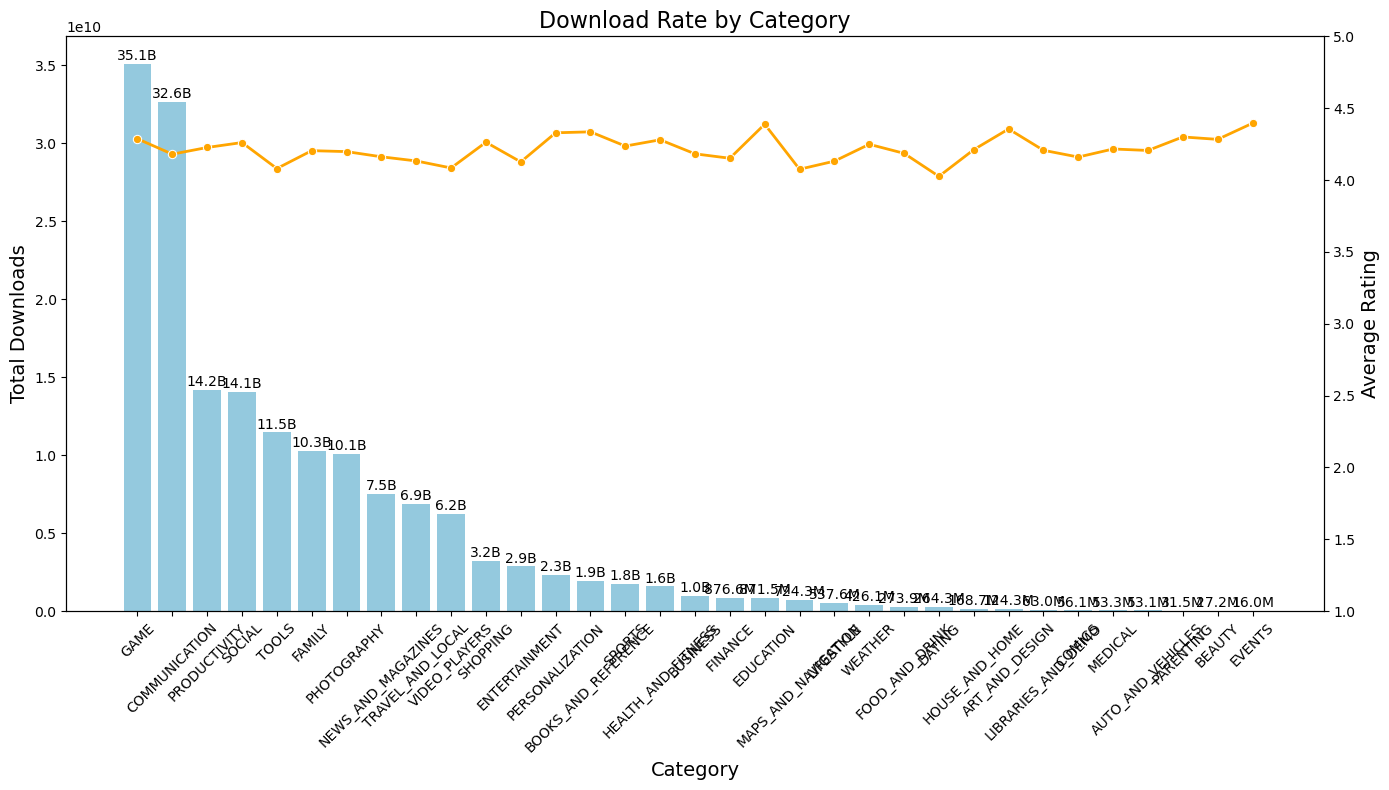

In [163]:
# Formatting the Total Downloads into readable values (millions or billions)
def format_downloads(value):
    if value >= 1e9:
        return f"{value / 1e9:.1f}B"
    elif value >= 1e6:
        return f"{value / 1e6:.1f}M"
    else:
        return str(value)

# Aggregating the total downloads and average rating by category
category_stats = df.groupby('Category').agg(
    Total_Downloads=('Installs', 'sum'),
    Average_Rating=('Rating', 'mean')
).sort_values(by='Total_Downloads', ascending=False)

# Apply the formatting to the Total Downloads column
category_stats['Downloads(in M & B)'] = category_stats['Total_Downloads'].apply(format_downloads)

print("\nDownload Rate and User Rating by Category:\n")
print(category_stats[['Total_Downloads', 'Downloads(in M & B)', 'Average_Rating']])


fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x=category_stats.index, y=category_stats['Total_Downloads'], ax=ax1, color='skyblue')
ax1.set_xlabel('Category', fontsize=14)
ax1.set_ylabel('Total Downloads', fontsize=14)
ax1.set_title('Download Rate by Category', fontsize=16)
ax1.tick_params(axis='x', rotation=45)

for index, value in enumerate(category_stats['Total_Downloads']):
    ax1.text(index, value + 0.05e9, f"{category_stats['Downloads(in M & B)'].iloc[index]}", ha='center', va='bottom', fontsize=10)

# Creating a second y-axis for Average Rating
ax2 = ax1.twinx()
sns.lineplot(x=category_stats.index, y=category_stats['Average_Rating'], ax=ax2, color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Average Rating', fontsize=14)
ax2.set_ylim(1, 5)  
plt.tight_layout()
plt.show()